In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import random as rnd

In [13]:
def intensity_equation_plotter(start, max_t,shift):
    intensity_function = lambda t: 1-np.exp(-(shift+t))
    x=np.linspace(0,max_t,1000)
    y=intensity_function(x)
    plt.plot(x+np.ones(len(x))*start,y,color='black')

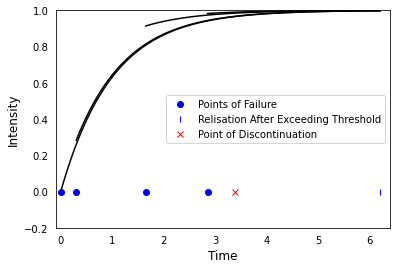

In [15]:
beta=0.99
equipment_times=[0]
intensities=[0]
time_line=[0]
real_time=0
equipment_time=0
shift = 0


while True:
    
    intensity_function =lambda t: 1-np.exp(-(t+shift)) # Define the intensity functions based on the current shift
    integral_equation = lambda t: 1-np.exp(1-t-np.exp(-(t+shift))) # Define the integral equation based on current shift

    repair_coefficent=sp.uniform.rvs(size=1)[0]

    inverse_time=0 # Here we solve for the time until threshold is met to get the support of our random variable
    while intensity_function(inverse_time)<beta:
        inverse_time+=0.01

    univariate=sp.uniform.rvs(size=1)[0] # Now we use the Probability Integral Transform to sample from the distributiond
    tau=0
    while integral_equation(tau)<univariate:
        tau+=0.01
        
        
    if intensity_function(tau)>beta: # At this point we retire the piece of equipment if the point of the next failure occurs
        real_time+=inverse_time      # at a time that brings the intensity of the equipment beyond the threhold value
        time_line.append(time_line[-1]+tau)
        intensities.append(beta)
        equipment_times.append(equipment_times[-1]+inverse_time)
        break
        
    repair_coefficent=(inverse_time-tau)*repair_coefficent+tau # We now generate the repair coefficent
    
    real_time+=tau # We update the real time
    equipment_time+=tau*(repair_coefficent) # We update the equipment time based on the repair that was made
    time_line.append(real_time)
    shift=equipment_time
    intensities.append(float(intensity_function(equipment_time)))
    equipment_times.append(equipment_time)
    


for i in range(len(equipment_times)-1): # This plots the intensity function associated for each failure
    intensity_equation_plotter(time_line[i],max(time_line)-time_line[i],equipment_times[i])
    
# The following plots illustrate the timeline of the piece of equipment
plt.plot(time_line[0:-1],np.zeros(len(time_line)-1),'o',color='blue',label='Points of Failure')
plt.plot(time_line[-1],0,'|',color='blue',label='Relisation After Exceeding Threshold')
plt.plot(time_line[-2]+inverse_time,0,'x',color='red',label='Point of Discontinuation')

# In this block we format the plot
plt.axis([-0.1,time_line[-1]+0.2,-0.2,1])
plt.axis(True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.legend(fontsize=10)

# Here we save the figure
#plt.savefig('inhomogeneous_failure_repair_model2.pdf')